# 1. Melakukan Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#untuk mengabaikn warning
warnings.filterwarnings("ignore")
print ("semua library diatas termuat")

semua library diatas termuat


# 2. Data Loading

In [4]:
df = pd.read_csv("pollutant-standards-index-southtangerang-2020-2022.csv")
df

,Date,PM2.5,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,45,30,2,69,19.0,0,69,CO,Moderate
1,1/2/2020,44,16,2,58,33.0,0,58,CO,Moderate
2,1/3/2020,43,12,2,46,18.0,0,46,CO,Good
3,1/4/2020,40,8,2,84,29.0,0,84,CO,Moderate
4,1/5/2020,38,8,3,50,0.0,0,50,CO,Good
...,...,...,...,...,...,...,...,...,...,...
1091,12/27/2022,50,19,16,12,NaN,4,19,PM2.5,Moderate
1092,12/28/2022,51,20,16,12,NaN,4,20,PM2.5,Moderate
1093,12/29/2022,52,21,16,13,NaN,4,21,PM2.5,Moderate
1094,12/30/2022,53,22,17,13,NaN,4,22,PM2.5,Moderate


# 3. Data understending

In [6]:
feature_dataset = pd.Series(["Date","PM10","SO2","CO","O3","NO2","Max","Critical Component","Categoy"],index=[1,2,3,4,5,6,7,8,9])
penjelasan_feature = pd.Series(["Tanggal pengukuran","Pengukuran Materi Partikulat","Pengukuran Sulfur Dioksida","Pengukuran Karbon Monoksida","Pengukuran ozon","Pengukuran Natrium DIoksida","Nilai pengukuran tertinggi","Komponen nilai pengukuran tertinggi","Kategori pencemaran udara baik atau tidak"],index=[1,2,3,4,5,6,7,8,9])

deskripsi_variabel = pd.DataFrame({"Nama Feature":feature_dataset,
                                  "Penjelasan":penjelasan_feature})
deskripsi_variabel

,Nama Feature,Penjelasan
1,Date,Tanggal pengukuran
2,PM10,Pengukuran Materi Partikulat
3,SO2,Pengukuran Sulfur Dioksida
4,CO,Pengukuran Karbon Monoksida
5,O3,Pengukuran ozon
6,NO2,Pengukuran Natrium DIoksida
7,Max,Nilai pengukuran tertinggi
8,Critical Component,Komponen nilai pengukuran tertinggi
9,Categoy,Kategori pencemaran udara baik atau tidak


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1096 non-null   object 
 1   PM2.5               1096 non-null   int64  
 2   PM10                1096 non-null   int64  
 3   SO2                 1096 non-null   int64  
 4   CO                  1096 non-null   int64  
 5   O3                  1036 non-null   float64
 6   NO2                 1096 non-null   int64  
 7   Max                 1096 non-null   int64  
 8   Critical Component  1096 non-null   object 
 9   Category            1096 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 85.8+ KB


# 4. Statistik Deskriprif

In [9]:
df.describe()

,PM2.5,PM10,SO2,CO,O3,NO2,Max
count,1096.000000,1096.000000,1096.000000,1096.000000,1036.000000,1096.000000,1096.000000
mean,44.193431,18.738139,10.580292,18.820255,20.960425,2.374088,29.235401
std,10.826190,7.290818,8.068708,17.066338,12.467208,2.227808,15.907933
min,19.000000,3.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,35.000000,13.000000,1.000000,10.000000,15.000000,0.000000,20.000000
50%,45.000000,17.000000,14.000000,12.000000,20.000000,3.000000,24.000000
75%,53.000000,23.000000,16.000000,21.000000,26.000000,4.000000,31.000000
max,66.000000,60.000000,28.000000,164.000000,81.000000,8.000000,164.000000


# 5. Mengecek keseimbangan data

In [11]:
df["Category"].value_counts()

Category
Moderate     639
Good         393
Unhealthy     64
Name: count, dtype: int64

# 6. Data Cleansing dan data preprosesing

In [13]:
df.isna().sum()

Date                   0
PM2.5                  0
PM10                   0
SO2                    0
CO                     0
O3                    60
NO2                    0
Max                    0
Critical Component     0
Category               0
dtype: int64

# 7. Mengisi missing value dengan nilai mean pada O3

In [15]:
df["O3"] = df["O3"].fillna(df["O3"].mean())

In [16]:
df.isna().sum()

Date                  0
PM2.5                 0
PM10                  0
SO2                   0
CO                    0
O3                    0
NO2                   0
Max                   0
Critical Component    0
Category              0
dtype: int64

# 8. Mengecek Outller ( titik data yang berbeda dari yang lainnnya )

In [18]:
df_baru = df[["PM2.5","PM10","SO2","NO2","CO","Category"]]

In [19]:
df_baru

,PM2.5,PM10,SO2,NO2,CO,Category
0,45,30,2,0,69,Moderate
1,44,16,2,0,58,Moderate
2,43,12,2,0,46,Good
3,40,8,2,0,84,Moderate
4,38,8,3,0,50,Good
...,...,...,...,...,...,...
1091,50,19,16,4,12,Moderate
1092,51,20,16,4,12,Moderate
1093,52,21,16,4,13,Moderate
1094,53,22,17,4,13,Moderate


<Axes: >

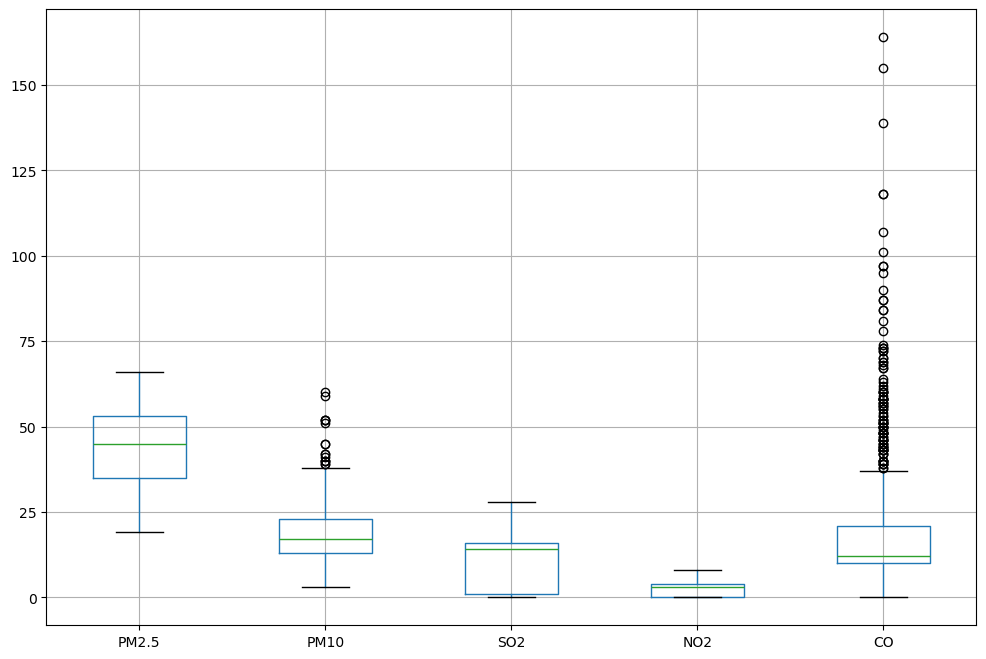

In [20]:
#membuat boxplot outlier
plt.figure(figsize=(12,8))

df_baru.boxplot()

In [21]:
#9. hilangkan outler
def hapus_outlier(data):
    df_bersih = data.copy() #kita melakukan copy data kedalam variabel df_bersih
    for col in df_bersih.columns: #memanggil nama setiap kolom yang disimpan ke dalam variabel col untuk di proses
    #col=pm2.5
        Q1 = data[col].quantile(0.25)#untuk menghitung Q!
        Q3 = data[col].quantile(0.75)#untuk menghitung Q3
        IQR = Q3-Q1 #untuk menghitung IQR range antara Q3 dan Q1
        upper_bound = Q3 + 1.5 * IQR #menghapus outlier bagian atas
        lower_bound = Q1 - 1.5 * IQR#menghitung outlier bagian bawah
        df_bersih = df_bersih[(df_bersih[col]> lower_bound) &(df_bersih[col]<upper_bound)]
    return df_bersih

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() #load label encodernya

In [23]:
df_baru["Category"]=label_encoder.fit_transform(df_baru["Category"])

In [24]:
df_baru["Category"].value_counts()

Category
1    639
0    393
2     64
Name: count, dtype: int64

In [25]:
df_no_outlier = hapus_outlier(df_baru)

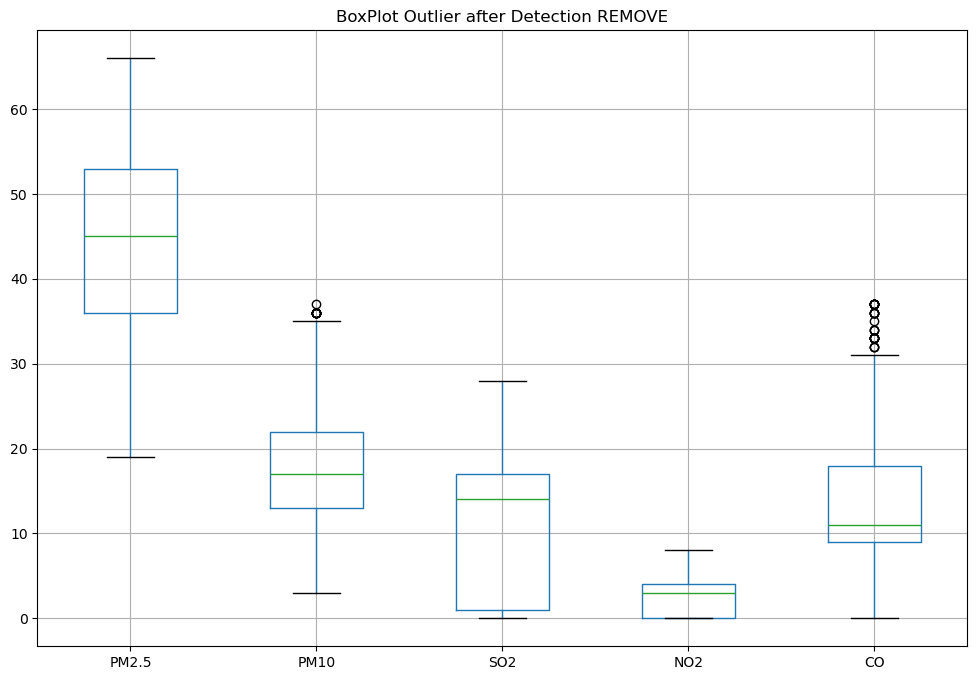

In [26]:
#membuat boxplot outlier
plt.figure(figsize=(12,8))
df_no_outlier[["PM2.5","PM10","SO2","NO2","CO"]].boxplot()
plt.title("BoxPlot Outlier after Detection REMOVE")
plt.show()

# 10. PEMBAGIAN DATA LATIH DAN UJI

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x = df_no_outlier.drop(["Category"], axis=1)
y = df_no_outlier["Category"]

# 11. Machine learning (pelatihan dan pengujian 3 rasio)

In [39]:
from sklearn.ensemble import GradientBoostingClassifier #import GBC
from sklearn.neighbors import KNeighborsClassifier #import KNN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #metrics eval

In [41]:
rasio = [0.2,0.3,0.4]

In [43]:
model_gbc = GradientBoostingClassifier(random_state=42)
model_knn = KNeighborsClassifier(n_neighbors=5)
model = [model_gbc,model_knn]

In [34]:
for i in rasio:
    
    #setting rasio loop
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i, random_state=42)
    
    #memuat model
    model = model_gbc
    
    #melatih model
    model.fit(x_train, y_train)
    
    #menghitung sisi dari pelatihan
    y_pred_train = model.predict(x_train)
    
    #menghitung sisi dari pengujian
    y_pred_test = model.predict(x_test)
    
    
    print(f"Hasil peforma akurasi dari rasio {i}")
    #mengghitung akurasi SKOR training
    print("Hasil akurasi pelatihan model GBC adalah ", accuracy_score(y_pred_train,y_train)*100)
    print(f"Hasil Klasifikasin Report dari model GBC rasio {i} pelatihan")
    print(classification_report(y_pred_train,y_train))
    
    #mengghitung akurasi SKOR pengujian
    print("Hasil akurasi pengujian model GBC adalah ", accuracy_score(y_pred_test,y_test)*100)
    print(f"Hasil Klasifikasin Report dari model GBC rasio {i} pengujian")
    print(classification_report(y_pred_test,y_test))
    
    print("==============================================================================")



Hasil peforma akurasi dari rasio 0.2
Hasil akurasi pelatihan model GBC adalah  92.09183673469387
Hasil Klasifikasin Report dari model GBC rasio 0.2 pelatihan
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       292
           1       0.94      0.93      0.93       466
           2       0.93      0.96      0.94        26

    accuracy                           0.92       784
   macro avg       0.92      0.93      0.93       784
weighted avg       0.92      0.92      0.92       784

Hasil akurasi pengujian model GBC adalah  79.59183673469387
Hasil Klasifikasin Report dari model GBC rasio 0.2 pengujian
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        70
           1       0.85      0.84      0.84       118
           2       0.50      0.38      0.43         8

    accuracy                           0.80       196
   macro avg       0.70      0.66      0.68       196
weighted avg  

In [35]:
for i in rasio:
    
    #setting rasio loop
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i, random_state=42)
    
    
    for algoritma in model:
    #memuat model
        model = algoritma

        #melatih model
        model.fit(x_train, y_train)

        #menghitung sisi dari pelatihan
        y_pred_train = model.predict(x_train)

        #menghitung sisi dari pengujian
        y_pred_test = model.predict(x_test)


        print(f"Hasil peforma akurasi dari rasio {i} dengan algoritma {algoritma}")
        #mengghitung akurasi SKOR training
        print("Hasil akurasi pelatihan model GBC adalah ", accuracy_score(y_pred_train,y_train)*100)

        #mengghitung akurasi SKOR pengujian
        print("Hasil akurasi pengujian model GBC adalah ", accuracy_score(y_pred_test,y_test)*100)

        print("==============================================================================")

AttributeError: 'numpy.ndarray' object has no attribute 'fit'

# KNN

In [122]:
for i in rasio:
    
    #setting rasio loop
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i, random_state=42)
    
    #memuat model
    model = model_knn
    
    #melatih model
    model.fit(x_train, y_train)
    
    #menghitung sisi dari pelatihan
    y_pred_train = model.predict(x_train)
    
    #menghitung sisi dari pengujian
    y_pred_test = model.predict(x_test)
    
    
    print(f"Hasil peforma akurasi dari rasio {i}")
    #mengghitung akurasi SKOR training
    print("Hasil akurasi pelatihan model Knn adalah ", accuracy_score(y_pred_train,y_train)*100)
    print(f"Hasil Klasifikasin Report dari model KNN rasio {i} pelatihan")
    print(classification_report(y_pred_train,y_train))
    
    #mengghitung akurasi SKOR pengujian
    print("Hasil akurasi pengujian model KNN adalah ", accuracy_score(y_pred_test,y_test)*100)
    print(f"Hasil Klasifikasin Report dari model KNN rasio {i} pengujian")
    print(classification_report(y_pred_test,y_test))
    
    print("==============================================================================")

Hasil peforma akurasi dari rasio 0.2
Hasil akurasi pelatihan model Knn adalah  87.75510204081633
Hasil Klasifikasin Report dari model KNN rasio 0.2 pelatihan
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       322
           1       0.90      0.92      0.91       452
           2       0.22      0.60      0.32        10

    accuracy                           0.88       784
   macro avg       0.67      0.78      0.70       784
weighted avg       0.89      0.88      0.88       784

Hasil akurasi pengujian model KNN adalah  76.0204081632653
Hasil Klasifikasin Report dari model KNN rasio 0.2 pengujian
              precision    recall  f1-score   support

           0       0.78      0.67      0.72        85
           1       0.79      0.83      0.81       111
           2       0.00      0.00      0.00         0

    accuracy                           0.76       196
   macro avg       0.52      0.50      0.51       196
weighted avg   

# RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rasio = [0.2,0.3,0.4]

In [45]:
model_gbc = GradientBoostingClassifier(random_state=42)
model_rfc = RandomForestClassifier(n_estimators=100,random_state=42)
model = [model_gbc,model_rfc]

In [75]:
for i in rasio:
    
    #setting rasio loop
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i, random_state=42)
    
    #memuat model
    model = model_rfc
    
    #melatih model
    model.fit(x_train, y_train)
    
    #menghitung sisi dari pelatihan
    y_pred_train = model.predict(x_train)
    
    #menghitung sisi dari pengujian
    y_pred_test = model.predict(x_test)
    
    
    print(f"Hasil peforma akurasi dari rasio {i}")
    #mengghitung akurasi SKOR training
    print("Hasil akurasi pelatihan model knn adalah ", accuracy_score(y_pred_train,y_train)*100)
    print(f"Hasil Klasifikasin Report dari model KNN rasio {i} pelatihan")
    print(classification_report(y_pred_train,y_train))
    
    #mengghitung akurasi SKOR pengujian
    print("Hasil akurasi pengujian model knn adalah ", accuracy_score(y_pred_test,y_test)*100)
    print(f"Hasil Klasifikasin Report dari model KNN rasio {i} pengujian")
    print(classification_report(y_pred_test,y_test))
    
    print("==============================================================================")

Hasil peforma akurasi dari rasio 0.2
Hasil akurasi pelatihan model knn adalah  97.5765306122449
Hasil Klasifikasin Report dari model KNN rasio 0.2 pelatihan
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       297
           1       0.98      0.98      0.98       460
           2       1.00      1.00      1.00        27

    accuracy                           0.98       784
   macro avg       0.98      0.98      0.98       784
weighted avg       0.98      0.98      0.98       784

Hasil akurasi pengujian model knn adalah  85.20408163265306
Hasil Klasifikasin Report dari model KNN rasio 0.2 pengujian
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        75
           1       0.87      0.89      0.88       114
           2       0.67      0.57      0.62         7

    accuracy                           0.85       196
   macro avg       0.79      0.76      0.77       196
weighted avg   

# Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
rasio = [0.2,0.3,0.4]

In [60]:
model_gbc = GradientBoostingClassifier(random_state=42)
model_nb= GaussianNB()
model = [model_gbc,model_nb]

In [130]:
for i in rasio:
    
    #setting rasio loop
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i, random_state=42)
    
    #memuat model
    model = model_nb
    
    #melatih model
    model.fit(x_train, y_train)
    
    #menghitung sisi dari pelatihan
    y_pred_train = model.predict(x_train)
    
    #menghitung sisi dari pengujian
    y_pred_test = model.predict(x_test)
    
    
    print(f"Hasil peforma akurasi dari rasio {i}")
    #mengghitung akurasi SKOR training
    print("Hasil akurasi pelatihan model nb adalah ", accuracy_score(y_pred_train,y_train)*100)
    print(f"Hasil Klasifikasin Report dari model Naive Bayes rasio {i} pelatihan")
    print(classification_report(y_pred_train,y_train))
    
    #mengghitung akurasi SKOR pengujian
    print("Hasil akurasi pengujian model nb adalah ", accuracy_score(y_pred_test,y_test)*100)
    print(f"Hasil Klasifikasin Report dari model Naive Bayes rasio {i} pengujian")
    print(classification_report(y_pred_test,y_test))
    
    print("==============================================================================")

Hasil peforma akurasi dari rasio 0.2
Hasil akurasi pelatihan model nb adalah  52.423469387755105
Hasil Klasifikasin Report dari model Naive Bayes rasio 0.2 pelatihan
              precision    recall  f1-score   support

           0       0.22      0.68      0.34        97
           1       0.69      0.72      0.70       442
           2       1.00      0.11      0.20       245

    accuracy                           0.52       784
   macro avg       0.64      0.50      0.41       784
weighted avg       0.73      0.52      0.50       784

Hasil akurasi pengujian model nb adalah  52.04081632653062
Hasil Klasifikasin Report dari model Naive Bayes rasio 0.2 pengujian
              precision    recall  f1-score   support

           0       0.25      0.62      0.35        29
           1       0.67      0.70      0.68       112
           2       1.00      0.11      0.20        55

    accuracy                           0.52       196
   macro avg       0.64      0.48      0.41       196

# XBOOST

In [66]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [79]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
rasio = [0.2,0.3,0.4]

In [85]:
model_gbc = GradientBoostingClassifier(random_state=42)
model_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric="mlogloss")
model = [model_gbc,model_xgb]

In [87]:
for i in rasio:
    
    #setting rasio loop
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i, random_state=42)
    
    #memuat model
    model = model_xgb
    
    #melatih model
    model.fit(x_train, y_train)
    
    #menghitung sisi dari pelatihan
    y_pred_train = model.predict(x_train)
    
    #menghitung sisi dari pengujian
    y_pred_test = model.predict(x_test)
    
    
    print(f"Hasil peforma akurasi dari rasio {i}")
    #mengghitung akurasi SKOR training
    print("Hasil akurasi pelatihan model xgb adalah ", accuracy_score(y_pred_train,y_train)*100)
    print(f"Hasil Klasifikasin Report dari model XGBOOST rasio {i} pelatihan")
    print(classification_report(y_pred_train,y_train))
    
    #mengghitung akurasi SKOR pengujian
    print("Hasil akurasi pengujian model xgb adalah ", accuracy_score(y_pred_test,y_test)*100)
    print(f"Hasil Klasifikasin Report dari model XGBOOST rasio {i} pengujian")
    print(classification_report(y_pred_test,y_test))
    
    print("==============================================================================")

Hasil peforma akurasi dari rasio 0.2
Hasil akurasi pelatihan model xgb adalah  87.5
Hasil Klasifikasin Report dari model XGBOOST rasio 0.2 pelatihan
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       287
           1       0.91      0.89      0.90       474
           2       0.74      0.87      0.80        23

    accuracy                           0.88       784
   macro avg       0.83      0.87      0.85       784
weighted avg       0.88      0.88      0.88       784

Hasil akurasi pengujian model xgb adalah  75.0
Hasil Klasifikasin Report dari model XGBOOST rasio 0.2 pengujian
              precision    recall  f1-score   support

           0       0.71      0.68      0.70        76
           1       0.79      0.80      0.79       115
           2       0.50      0.60      0.55         5

    accuracy                           0.75       196
   macro avg       0.67      0.69      0.68       196
weighted avg       0.75      0.7

# ADABOOST

In [111]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [113]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [89]:
rasio = [0.2,0.3,0.4]

In [117]:
model_gbc = GradientBoostingClassifier(random_state=42)
model_adab = AdaBoostClassifier(
    n_estimators=50,  # Jumlah weak learners
    learning_rate=1.0,  
    random_state=42
)

model = [model_gbc,model_adab]

In [119]:
for i in rasio:
    
    #setting rasio loop
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=i, random_state=42)
    
    #memuat model
    model = model_adab
    
    #melatih model
    model.fit(x_train, y_train)
    
    #menghitung sisi dari pelatihan
    y_pred_train = model.predict(x_train)
    
    #menghitung sisi dari pengujian
    y_pred_test = model.predict(x_test)
    
    
    print(f"Hasil peforma akurasi dari rasio {i}")
    #mengghitung akurasi SKOR training
    print("Hasil akurasi pelatihan model adab adalah ", accuracy_score(y_pred_train,y_train)*100)
    print(f"Hasil Klasifikasin Report dari model Adaboost rasio {i} pelatihan")
    print(classification_report(y_pred_train,y_train))
    
    #mengghitung akurasi SKOR pengujian
    print("Hasil akurasi pengujian model xgb adalah ", accuracy_score(y_pred_test,y_test)*100)
    print(f"Hasil Klasifikasin Report dari model Adaboost rasio {i} pengujian")
    print(classification_report(y_pred_test,y_test))
    
    print("==============================================================================")

Hasil peforma akurasi dari rasio 0.2
Hasil akurasi pelatihan model adab adalah  61.86224489795919
Hasil Klasifikasin Report dari model Adaboost rasio 0.2 pelatihan
              precision    recall  f1-score   support

           0       0.28      0.50      0.36       161
           1       0.83      0.64      0.72       598
           2       0.74      0.80      0.77        25

    accuracy                           0.62       784
   macro avg       0.62      0.65      0.62       784
weighted avg       0.71      0.62      0.65       784

Hasil akurasi pengujian model xgb adalah  57.14285714285714
Hasil Klasifikasin Report dari model Adaboost rasio 0.2 pengujian
              precision    recall  f1-score   support

           0       0.19      0.44      0.27        32
           1       0.82      0.61      0.70       157
           2       0.33      0.29      0.31         7

    accuracy                           0.57       196
   macro avg       0.45      0.44      0.43       196
wei